# Exploration of weather data
Data is taken from openweathermap.org API.

## Prerequisits
Frequenzy is one hour.

In [1]:
import toml
import sqlalchemy
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (14, 8)

conf = '../../conf.toml'
conn = 'postgresql+psycopg2://{user}:{password}@{host}:{port}/{dbname}'

conf = toml.load(conf)

conn = conn.format(**conf['database']['pi'])
conn = sqlalchemy.create_engine(conn)
conn = conn.connect()

owm = pd.read_sql_table('weather', conn, index_col='datetime')
owm.index = owm.index.tz_convert('Europe/Berlin')
owm.index = owm.index.tz_localize(None)
owm.index.freq = owm.index.inferred_freq
owm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2021-06-01 05:00:00 to 2021-06-03 04:00:00
Freq: H
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        48 non-null     float64
 1   feels_like  48 non-null     float64
 2   pressure    48 non-null     int64  
 3   humidity    48 non-null     int64  
 4   dew_point   48 non-null     float64
 5   uvi         48 non-null     float64
 6   clouds      48 non-null     int64  
 7   visibility  48 non-null     int64  
 8   wind_speed  48 non-null     float64
 9   wind_deg    48 non-null     int64  
 10  wind_gust   48 non-null     float64
 11  pop         48 non-null     float64
 12  rain        48 non-null     float64
dtypes: float64(8), int64(5)
memory usage: 5.2 KB


## Plot Time Series

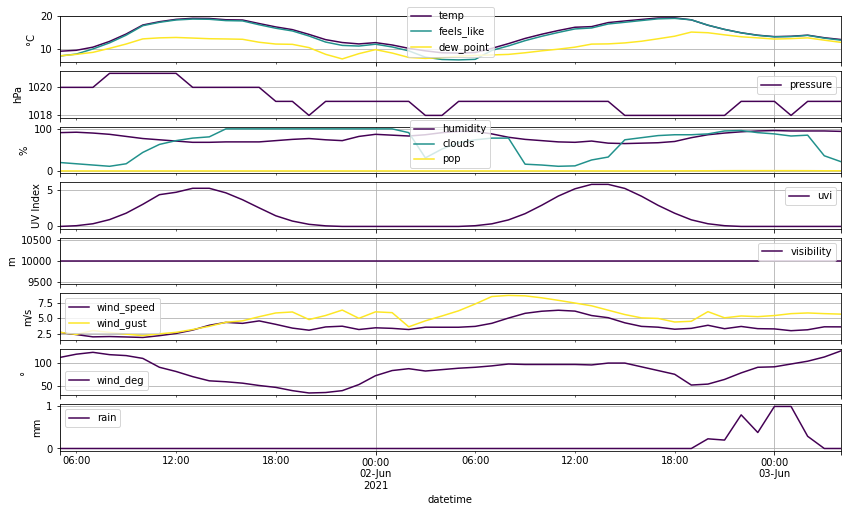

,temp,feels_like,pressure,humidity,dew_point,uvi,clouds,visibility,wind_speed,wind_deg,wind_gust,pop,rain
datetime,,,,,,,,,,,,,
2021-06-01 05:00:00,9.31,7.87,1020,91,7.92,0.00,20,10000,2.70,112,2.73,0.00,0.00
2021-06-01 06:00:00,9.60,8.46,1020,92,8.37,0.10,17,10000,2.35,119,2.37,0.00,0.00
2021-06-01 07:00:00,10.55,10.01,1020,90,8.98,0.37,14,10000,1.98,123,3.00,0.00,0.00
2021-06-01 08:00:00,12.29,11.85,1021,87,10.19,0.94,11,10000,2.03,118,2.70,0.00,0.00
2021-06-01 09:00:00,14.53,14.18,1021,82,11.50,1.83,17,10000,1.96,116,2.42,0.00,0.00
2021-06-01 10:00:00,17.25,17.04,1021,77,13.05,3.05,44,10000,1.88,110,2.17,0.00,0.00
2021-06-01 11:00:00,18.25,18.06,1021,74,13.36,4.38,63,10000,2.17,91,2.47,0.00,0.00
2021-06-01 12:00:00,18.96,18.77,1021,71,13.48,4.71,72,10000,2.53,82,2.71,0.00,0.00
2021-06-01 13:00:00,19.28,19.04,1020,68,13.30,5.26,78,10000,3.08,71,3.17,0.00,0.00


In [2]:
columns = {'°C': ['temp', 'feels_like', 'dew_point'], 'hPa': 'pressure',
           '%': ['humidity', 'clouds', 'pop'], 'UV Index': 'uvi',
           'm': 'visibility', 'm/s': ['wind_speed', 'wind_gust'],
           '°': 'wind_deg', 'mm': 'rain'}

fig, ax = plt.subplots(len(columns), sharex=True)
for i, y in enumerate(columns):
    owm[columns[y]].plot(ax=ax[i], grid=True, legend=True, ylabel=y,
                         colormap='viridis')
plt.show()
owm

## Box Plots

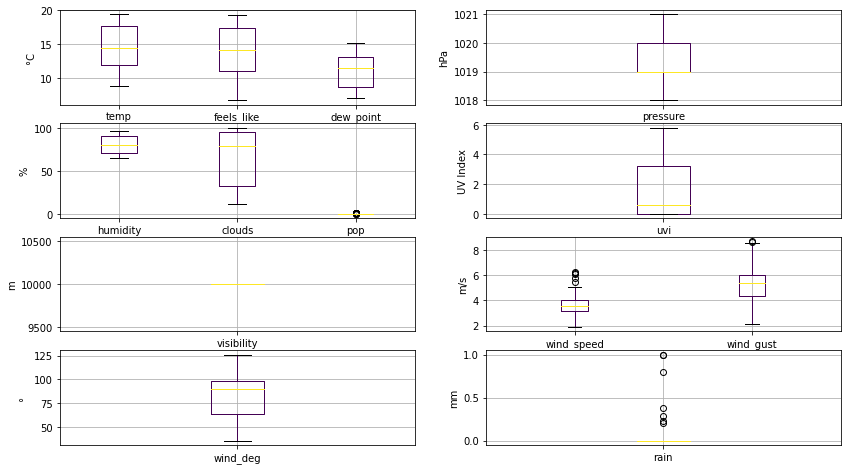

,temp,feels_like,pressure,humidity,dew_point,uvi,clouds,visibility,wind_speed,wind_deg,wind_gust,pop,rain
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0,48.000000,48.000000,48.000000,48.000000,48.000000
mean,14.553333,14.020000,1019.145833,80.291667,11.038333,1.706042,66.520833,10000.0,3.662083,83.916667,5.245208,0.107083,0.081250
std,3.436864,3.837272,0.898926,10.384027,2.367741,2.047092,32.830311,0.0,1.071475,24.101588,1.732101,0.214971,0.237206
min,8.750000,6.700000,1018.000000,65.000000,6.990000,0.000000,11.000000,10000.0,1.880000,36.000000,2.170000,0.000000,0.000000
25%,11.845000,11.042500,1019.000000,70.750000,8.722500,0.000000,32.500000,10000.0,3.160000,64.250000,4.380000,0.000000,0.000000
50%,14.435000,14.115000,1019.000000,79.500000,11.495000,0.555000,78.500000,10000.0,3.545000,90.000000,5.370000,0.000000,0.000000
75%,17.762500,17.380000,1020.000000,90.250000,13.085000,3.207500,95.250000,10000.0,4.050000,98.000000,6.047500,0.015000,0.000000
max,19.420000,19.250000,1021.000000,96.000000,15.110000,5.800000,100.000000,10000.0,6.300000,126.000000,8.710000,0.660000,1.000000


In [3]:
l = len(columns) // 2
fig, ax = plt.subplots(l, l // 2)
ax = ax.reshape(-1)

for i, y in enumerate(columns):
    owm[columns[y]].plot.box(ax=ax[i], grid=True, legend=True, ylabel=y,
                             colormap='viridis')
plt.show()
owm.describe()

## Density

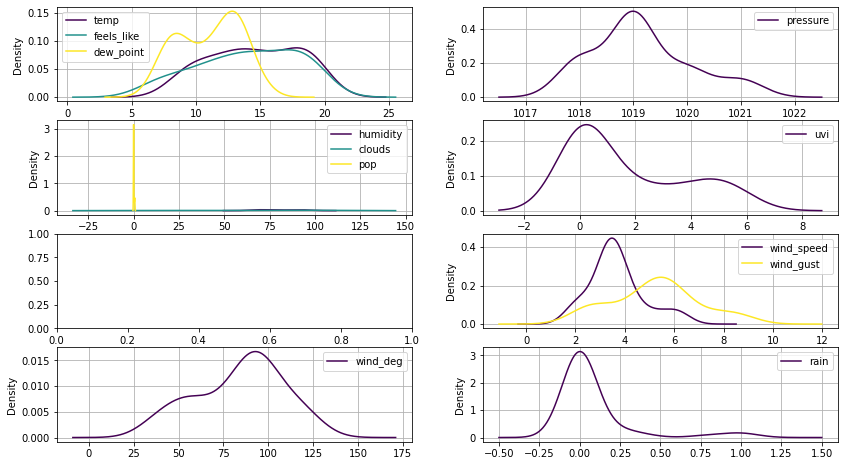

In [4]:
l = len(columns) // 2
fig, ax = plt.subplots(l, l // 2)
ax = ax.reshape(-1)

for i, y in enumerate(columns):
    df = owm[columns[y]]
    if df.std().all() != 0:
        df.plot.density(ax=ax[i], grid=True, legend=True, colormap='viridis')
plt.show()
